# Introduction

Defining a list in python is easy

Use square [ ] brackets
 
Use print( ) to see it

Use round brackets for any function

In [44]:
x = [1,2,3]
print(x)

[1, 2, 3]


# The Numpy Package

In [2]:
import numpy as np

Numpy is another way to define lists

In [46]:
N=10
time= np.linspace(1,10,N)
print(time)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [47]:
y=2*time
print(y)

[ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


In [51]:
y=np.cos(2*np.pi*time)
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Numpy is usefull since it has np.pi(), np.cos(), np.abs(), and other usefull built in functions

# Loops

In [53]:
for x in [1,2,3]: #Note the : and the following indentation
    print(x)

1
2
3


In [55]:
r=2
for x in [1,2,3]:
    print(x-r/2)
    print(x+r/2)
    print('---')

0.0
2.0
---
1.0
3.0
---
2.0
4.0
---


You can also use range(start, stop, step)

In [57]:
for x in range(0,10,2): # Note that range drops the last value!
    print(x)

0
2
4
6
8


We can do a sum using loops

In [9]:
y=0
for x in [1,2,3,4,5]: 
    y=y+x
    print(y)

1
3
6
10
15


In [10]:
np.sum([1,2,3,4,5])

15

We can also concatenate lists

In [11]:
y=[]
for x in [1,2,3,4,5]: 
    y.append(x)
    print(y)

[1]
[1, 2]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]


In [12]:
y=[]

list_of_lists= [ [1,2] , [3,4] , [5,6] ]

for x in list_of_lists: 
    y.append(x)
    print(y)

[[1, 2]]
[[1, 2], [3, 4]]
[[1, 2], [3, 4], [5, 6]]


# Indexing

We can access a part of a list using an index

In [13]:
simple_list = [10,20,30,40,50,60,70,80]
simple_list[0] # Square brackets are for indexing

10

In [14]:
simple_list[-1]

80

In [15]:
simple_list[:]

[10, 20, 30, 40, 50, 60, 70, 80]

In [16]:
simple_list[0:2] # Note that last value is dropped

[10, 20]

In [59]:
simple_list[0:5:2] # Start:Stop:Step

[10, 30, 50]

In [17]:
simple_list[::2] # Downsampling !

[10, 30, 50, 70]

For 2D lists

In [18]:
list_of_lists= [ [1,2] , [3,4] , [5,6] ]
list_of_lists[0]

[1, 2]

In [19]:
list_of_lists[0,1] # An error arises!

TypeError: list indices must be integers or slices, not tuple

In [20]:
# As a numpy, it works flawlessly
newlist=np.array(list_of_lists)
newlist[0,1]

2

# Plotting

In [61]:
import matplotlib.pyplot as plt

In [62]:
N=100
time= np.linspace(0,10,N)
y=np.cos(2*np.pi*time)
y2=np.sin(2*np.pi*time)

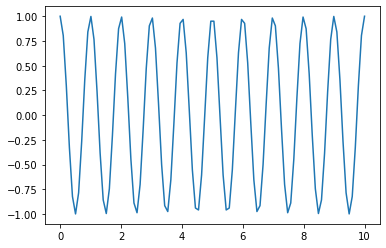

In [23]:
plt.plot(time,y) # x axis , y axis , options

(0.0, 2.0)

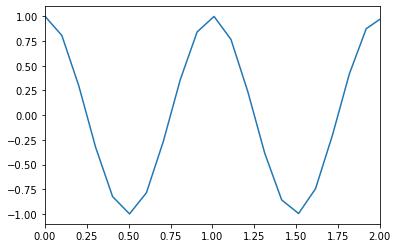

In [24]:
plt.plot(time,y)
plt.xlim([0,2]) # controls the x limits ( ylim is for y limits)

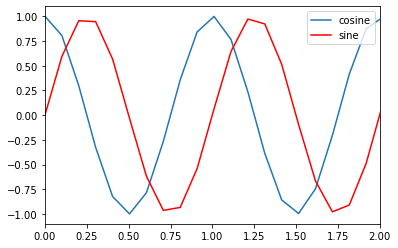

In [25]:
plt.plot(time,y,label='cosine') # the label is for the legend
plt.plot(time,y2,'r',label='sine') # another plot on the same figure using a different color 'r' ( r for red, g for green, b for blue,k for black)
plt.xlim([0,2])
plt.legend(loc='upper right') # places a legend

Text(0, 0.5, 'Signal (V)')

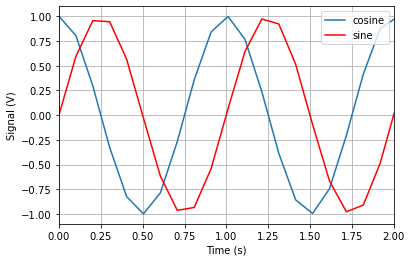

In [26]:
plt.plot(time,y,label='cosine')
plt.plot(time,y2,'r',label='sine')
plt.xlim([0,2])
plt.legend(loc='upper right')
plt.grid() # Adds a grid
plt.xlabel('Time (s)') # Adds an x label
plt.ylabel('Signal (V)') # Adds a y label

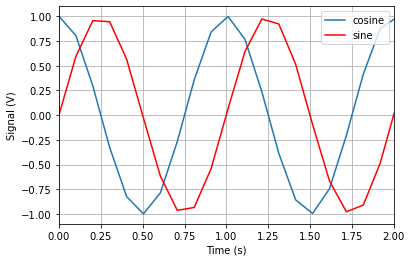

In [64]:
plt.plot(time,y,label='cosine')
plt.plot(time,y2,'r',label='sine')
plt.xlim([0,2])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Signal (V)')
plt.savefig('myfigure.png') # Saves the figure in working directory

# FFT

In [28]:
from scipy.fft import fft, fftfreq

In [71]:
x=np.linspace(0,10,100) # fs is 100/10 = 10
y=np.sin(2*np.pi*x)

N=len(y)
yf=(2/N) * np.abs(fft(y))  # Note teh 2/N and the absolute
xf=fftfreq(N,0.1) # ts=1/fs is the 0.1

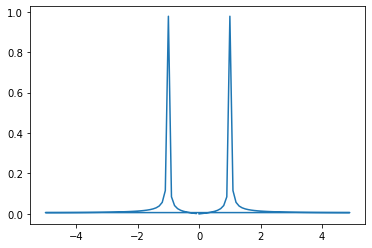

In [72]:
plt.plot(xf,yf)

In [73]:
# The number of points N does not change!
print( len(y) )
print( len(yf) )

100
100


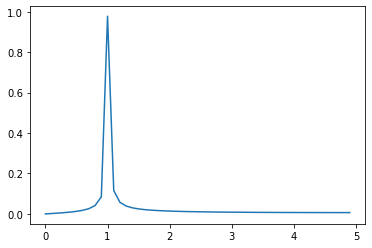

In [74]:
newxf=xf[0:N//2]
newyf=yf[0:N//2]

plt.plot(newxf,newyf)

In [32]:
10//3

3

# Filters

In [78]:
from scipy import signal

In [76]:
x=np.linspace(0,10,10000) # fs is 10000/10 = 1000
y=np.sin(2*np.pi*100*x) # frequency is 100 Hz

Example: Using a butterworth type filter:

In [77]:
order=8
f1 = 150
f2 = 250 
sos=signal.butter(order,[f1,f2], btype='bandpass', fs=1000, output='sos') # Creates the filter with type 'band'
databpf = signal.sosfilt(sos,y) # Applies the filter

btype could ba {'lowpass', 'highpass', 'bandpass', 'bandstop'}

example : signal.butter(order,fc, btype='lowpass', fs=1000, output='sos') 

always use output='sos' 

other options are signal.cheby1, signal.bessel, signal.ellip, ... 


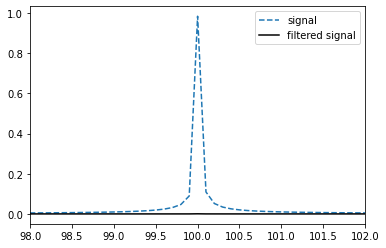

In [79]:
# Get the fft fo both unfiltered and filtered
N=len(y)
yf=(2/N) * np.abs(fft(y)) 
databpf_f=(2/N) * np.abs(fft(databpf))

# Truncate fft to RHS only
xf=fftfreq(N,1/1000) # ts=1/fs is the 0.1
yf=yf[0:N//2]
databpf_f=databpf_f[0:N//2]
xf=xf[0:N//2]

# Plot them
plt.plot(xf,yf,'--',label='signal')
plt.plot(xf,databpf_f,'k',label='filtered signal')
plt.xlim([98,102])
plt.legend()

Go back and try different bpf cuttoffs!

# Import / Export

### wav-files

In [80]:
from scipy.io import wavfile

In [38]:
fs,data = wavfile.read('file.wav') #loads the file and its sampling frequency

To export, the data must be compatible with wav format it must be integer from 0 to 255

In [39]:
y2=255*y / np.max(y) # new maximum is now 255
dataout = np.asarray(y2, dtype=np.int16) # to integer type 16

wavfile.write('file.wav',1000,dataout)

### csv-files

In [40]:
import pandas as pd
raw_data = pd.read_csv('EMG_Datasets.csv')
raw_data

,Time (s),EMG_Relaxed (mV),EMG_Contracted (mV)
0,0.000000,0.006408,0.077323
1,0.000488,0.020228,0.090928
2,0.000977,0.024025,0.105868
3,0.001465,0.029097,0.108858
4,0.001953,0.041916,0.096336
...,...,...,...
10235,4.998047,0.062229,0.081343
10236,4.998535,0.073073,0.093125
10237,4.999023,0.081152,0.092139
10238,4.999512,0.081137,0.081911


In [41]:
data=np.array(raw_data) # Turn data type from text to numbers

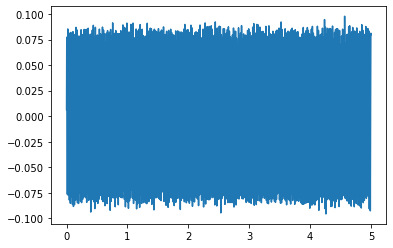

In [42]:
time=data[:,0]
volt_relaxed=data[:,1]
volt_contracted=data[:,2]

plt.plot(time,volt_relaxed) # plot the first column vs the second column

Exporting a csv file

In [43]:
dataframe=pd.DataFrame(data) # change to a dataframe (a Pandas data structure), and note the capitlization of DataFrame
dataframe.to_csv("NEW_Data.csv",index=False,header=['time','relaxed','contracted']) # Save to new csv files with custome headers